## Purpose of the project:
A fictitious organization called Women Tech Women Yes (WTWY) is attempting to organize a summer gala in New York City in order to "increase the participation of women in technology, and to concurrently build awareness and reach."

### Importing Libraries and Datas


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

In [3]:
df= pd.read_csv("/Users/emreoksuz/Desktop/MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")
df2=pd.read_csv("/Users/emreoksuz/Desktop/MTA_Daily_Ridership_Data__Beginning_2020.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5015198 entries, 0 to 5015197
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   transit_timestamp   object 
 1   station_complex_id  object 
 2   station_complex     object 
 3   borough             object 
 4   routes              object 
 5   payment_method      object 
 6   ridership           int64  
 7   transfers           int64  
 8   latitude            float64
 9   longitude           float64
 10  Georeference        object 
dtypes: float64(2), int64(2), object(7)
memory usage: 420.9+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Date                                                     1192 non-null   object 
 1   Subways: Total Estimated Ridership                       1192 non-null   int64  
 2   Subways: % of Comparable Pre-Pandemic Day                1192 non-null   float64
 3   Buses: Total Estimated Ridership                         1192 non-null   int64  
 4   Buses: % of Comparable Pre-Pandemic Day                  1192 non-null   float64
 5   LIRR: Total Estimated Ridership                          1191 non-null   float64
 6   LIRR: % of Comparable Pre-Pandemic Day                   1191 non-null   float64
 7   Metro-North: Total Estimated Ridership                   1192 non-null   int64  
 8   Metro-North: % of Comparable

In [6]:
df.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference
0,06/18/2023 07:00:00 PM,H023,DeKalb Av (L),BK,L,all,232,4,40.703810,-73.918430,POINT (-73.91843 40.70381)
1,06/18/2023 11:00:00 AM,C014,Prospect Av (R),BK,R,all,180,0,40.665413,-73.992874,POINT (-73.992874 40.665413)
2,01/24/2023 10:00:00 PM,R252,103 St (6),M,6,all,86,0,40.790600,-73.947480,POINT (-73.94748 40.7906)
3,09/05/2022 11:00:00 AM,R252,103 St (6),M,6,all,205,0,40.790600,-73.947480,POINT (-73.94748 40.7906)
4,05/08/2022 10:00:00 PM,R170,103 St (1),M,1,all,133,0,40.799446,-73.968376,POINT (-73.968376 40.799446)


In [7]:
df.columns

Index(['transit_timestamp', 'station_complex_id', 'station_complex', 'borough',
       'routes', 'payment_method', 'ridership', 'transfers', 'latitude',
       'longitude', 'Georeference'],
      dtype='object')

In [8]:
df.dtypes

transit_timestamp      object
station_complex_id     object
station_complex        object
borough                object
routes                 object
payment_method         object
ridership               int64
transfers               int64
latitude              float64
longitude             float64
Georeference           object
dtype: object

In [9]:
df[df.duplicated()]

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference


#### Using the second data to determine the most suitable month for organization, I calculated the total riderships by boroughs on a monthly basis.

Total ridership for month 1: 63734924
Total ridership for month 2: 70181466
Total ridership for month 3: 87293930
Total ridership for month 4: 83273427
Total ridership for month 5: 87695742
Total ridership for month 6: 87977903
Total ridership for month 7: 80514845
Total ridership for month 8: 82948894
Total ridership for month 9: 91019574
Total ridership for month 10: 95120931
Total ridership for month 11: 90905300
Total ridership for month 12: 91838943


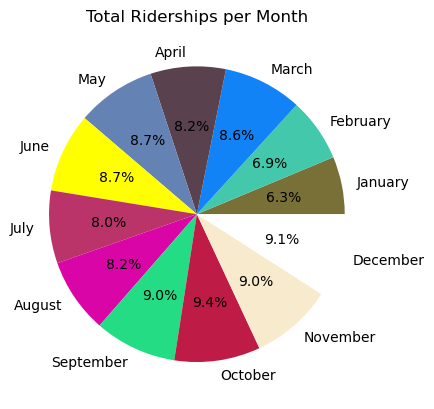

In [10]:
df_months = pd.read_csv("/Users/emreoksuz/Desktop/MTA_Daily_Ridership_Data__Beginning_2020.csv")

total_riderships = []

for month in range(1, 13):
    filtered_df = df_months [
        (pd.to_datetime(df_months["Date"]).dt.year == 2022) &
        (pd.to_datetime(df_months["Date"]).dt.month == month)
        ]
    total_ridership = filtered_df["Subways: Total Estimated Ridership"].sum()
    total_riderships.append(total_ridership)
    print(f"Total ridership for month {month}: {total_ridership}")

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = ["#797038", "#43c8ac", "#1183f6", "#59414e", "#6482b4", "yellow", "#ba3469", "#d905a6", "#23dc84", "#be1c47", "#f8eacc", "white"]

plt.pie(total_riderships, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Total Riderships per Month")
plt.show()

### Fixing the time zones

To work with better data, I fixed the time zones and assigned day names to determine the busiest days. Additionally, I narrowed the scope to the year 2022 for a more precise analysis.


In [11]:
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], errors='raise')
df['hour'] = df['transit_timestamp'].dt.hour
df['day_of_week'] = df['transit_timestamp'].dt.dayofweek
df['month'] = df['transit_timestamp'].dt.month
df['day'] = df['transit_timestamp'].dt.day
df_2022 = df[df['transit_timestamp'].dt.year == 2022]

In [12]:
change_it={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}

In [13]:
df_2022["day_of_week"]=df_2022["day_of_week"].map(change_it)

In [14]:
df_2022

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,hour,day_of_week,month,day
3,2022-09-05 11:00:00,R252,103 St (6),M,6,all,205,0,40.790600,-73.947480,POINT (-73.94748 40.7906),11,Monday,9,5
4,2022-05-08 22:00:00,R170,103 St (1),M,1,all,133,0,40.799446,-73.968376,POINT (-73.968376 40.799446),22,Sunday,5,8
5,2022-05-03 22:00:00,H007,1 Av (L),M,L,all,470,1,40.730953,-73.981630,POINT (-73.98163 40.730953),22,Tuesday,5,3
7,2022-04-13 10:00:00,R252,103 St (6),M,6,all,363,2,40.790600,-73.947480,POINT (-73.94748 40.7906),10,Wednesday,4,13
8,2022-02-28 20:00:00,H007,1 Av (L),M,L,all,482,8,40.730953,-73.981630,POINT (-73.98163 40.730953),20,Monday,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012998,2022-10-29 05:00:00,R523,Woodside-61 St (7),Q,7,all,174,12,40.745630,-73.902985,POINT (-73.902985 40.74563),5,Saturday,10,29
5013000,2022-04-17 14:00:00,R523,Woodside-61 St (7),Q,7,all,564,12,40.745630,-73.902985,POINT (-73.902985 40.74563),14,Sunday,4,17
5013001,2022-12-02 05:00:00,N530,York St (F),BK,F,all,33,0,40.701397,-73.986750,POINT (-73.98675 40.701397),5,Friday,12,2
5013002,2022-02-07 02:00:00,R419,Zerega Av (6),BX,6,all,1,0,40.836487,-73.847040,POINT (-73.84704 40.836487),2,Monday,2,7


#### I aggregate passengers by station and identify the busiest boroughs.

In [15]:
ridership_by_borough = pd.DataFrame(df_2022.groupby('borough')['ridership'].sum().astype(int))


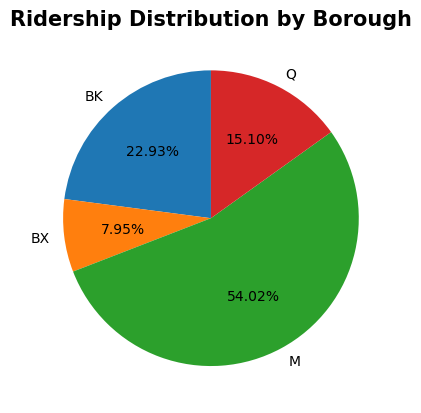

In [16]:
plt.title('Ridership Distribution by Borough', fontsize = 15, weight='bold')
plt.pie(ridership_by_borough.ridership, labels=ridership_by_borough.index, autopct='%1.2f%%', startangle=90);


In [17]:

df["station_complex"]


0            DeKalb Av (L)
1          Prospect Av (R)
2               103 St (6)
3               103 St (6)
4               103 St (1)
                ...       
5015193      Zerega Av (6)
5015194      Zerega Av (6)
5015195      Zerega Av (6)
5015196      Zerega Av (6)
5015197      Zerega Av (6)
Name: station_complex, Length: 5015198, dtype: object

In [67]:
sorted_values=df.sort_values("ridership",ascending=False)


In [68]:
sorted_values["station_complex"].unique()

array(['Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)',
       'Grand Central-42 St (S,4,5,6,7)', '161 St-Yankee Stadium (B,D,4)',
       'Fulton St (A,C,J,Z,2,3,4,5)', '34 St-Herald Sq (B,D,F,M,N,Q,R,W)',
       '47-50 Sts-Rockefeller Center (B,D,F,M)', 'Mets-Willets Point (7)',
       'Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)',
       'Lexington Av-53 St (E,M)/51 St (6)',
       '14 St-Union Sq (L,N,Q,R,W,4,5,6)', '34 St-Penn Station (A,C,E)',
       '34 St-Penn Station (1,2,3)', '59 St-Columbus Circle (A,B,C,D,1)',
       'Lexington Av (N,R,W)/59 St (4,5,6)',
       'Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)',
       '14 St (F,M,1,2,3)/6 Av (L)',
       'Coney Island-Stillwell Av (D,F,N,Q)', '72 St (1,2,3)',
       'Flushing-Main St (7)',
       '74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)',
       'Court Sq (E,G,M,7)', '5 Av-53 St (E,M)',
       'Canal St (J,N,Q,R,W,Z,6)', '14 St (A,C,E)/8 Av (L)',
       '86 St (4,5,6)', '34

In [20]:
sorted_values

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,hour,day_of_week,month,day
4727468,2023-06-13 17:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,24845,127,40.757310,-73.981964,POINT (-73.981964 40.75731),17,1,6,13
4739938,2023-05-03 17:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,24559,133,40.757310,-73.981964,POINT (-73.981964 40.75731),17,2,5,3
4732450,2023-06-14 17:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,24390,118,40.757310,-73.981964,POINT (-73.981964 40.75731),17,2,6,14
4730493,2023-06-06 17:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,24336,119,40.757310,-73.981964,POINT (-73.981964 40.75731),17,1,6,6
4738166,2023-05-17 17:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,24107,102,40.757310,-73.981964,POINT (-73.981964 40.75731),17,2,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784448,2023-01-29 01:00:00,J021,"Van Siclen Av (J,Z)",BK,"J,Z",all,1,0,40.678024,-73.891685,POINT (-73.891685 40.678024),1,6,1,29
2660225,2023-05-26 00:00:00,R639,"Church Av (2,5)",BK,"2,5",all,1,0,40.650845,-73.949580,POINT (-73.94958 40.650845),0,4,5,26
1921201,2023-04-16 03:00:00,B020,Avenue H (Q),BK,Q,all,1,0,40.629270,-73.961640,POINT (-73.96164 40.62927),3,6,4,16
4900560,2022-05-11 01:00:00,R413,Whitlock Av (6),BX,6,all,1,0,40.826527,-73.886284,POINT (-73.886284 40.826527),1,2,5,11


In [62]:
times_sq = df_2022[df_2022["station_complex"] == "Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)"]


In [63]:
times_sq

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,hour,day_of_week,month,day
4688375,2022-07-05 03:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,209,0,40.75731,-73.981964,POINT (-73.981964 40.75731),3,Tuesday,7,5
4688376,2022-10-08 12:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,5402,47,40.75731,-73.981964,POINT (-73.981964 40.75731),12,Saturday,10,8
4688378,2022-05-25 01:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,589,2,40.75731,-73.981964,POINT (-73.981964 40.75731),1,Wednesday,5,25
4688379,2022-03-14 22:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,3673,8,40.75731,-73.981964,POINT (-73.981964 40.75731),22,Monday,3,14
4688386,2022-10-25 05:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,2203,56,40.75731,-73.981964,POINT (-73.981964 40.75731),5,Tuesday,10,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716399,2022-08-04 12:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,4952,51,40.75731,-73.981964,POINT (-73.981964 40.75731),12,Thursday,8,4
4716401,2022-02-08 22:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,2696,18,40.75731,-73.981964,POINT (-73.981964 40.75731),22,Tuesday,2,8
4716403,2022-12-01 03:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,246,3,40.75731,-73.981964,POINT (-73.981964 40.75731),3,Thursday,12,1
4716405,2022-06-09 23:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,4386,24,40.75731,-73.981964,POINT (-73.981964 40.75731),23,Thursday,6,9


### Sorting stations

After sorting the data by month, hour, and day, I focused on June, as it appeared to be the busiest month based on the previous analysis. Then for better efficiency I have looked through the busiest hours.

In [64]:
times_sq = times_sq.sort_values(['month', 'hour','day'])



In [65]:
times_sq= times_sq[times_sq["month"]==6]
df3=times_sq.sort_values("ridership",ascending=False)
df3["hour"].unique()


array([17, 18, 16,  8, 22, 19, 15, 21,  9,  7, 20, 14, 23, 13, 12,  6, 10,
       11,  0,  5,  1,  2,  3,  4])

In [66]:
times_sq_day_of_week = pd.DataFrame(times_sq.groupby('day_of_week')['ridership'].mean().astype(int))
times_sq_day_of_week=times_sq_day_of_week.sort_values("ridership")
times_sq_day_of_week

,ridership
day_of_week,
Sunday,3415
Saturday,4205
Monday,5300
Friday,5803
Thursday,6205
Tuesday,6351
Wednesday,6434


<BarContainer object of 7 artists>

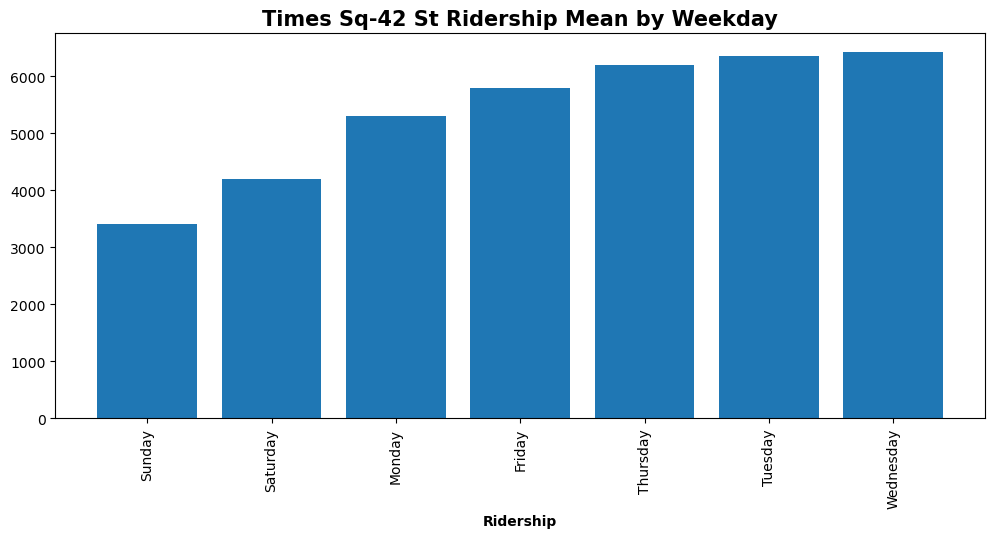

In [69]:
plt.figure(figsize = [12,5])
plt.title('Times Sq-42 St Ridership Mean by Weekday', fontsize = 15, weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.bar(times_sq_day_of_week.index,times_sq_day_of_week.ridership)


In [27]:
Grand_Central = df_2022[df_2022["station_complex"] == "Grand Central-42 St (S,4,5,6,7)"]


In [28]:
Grand_Central=Grand_Central.sort_values(['month', 'hour','day'])

In [29]:
Grand_Central= Grand_Central[Grand_Central["month"]==6]
df4=Grand_Central.sort_values("ridership",ascending=False)
df4


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,hour,day_of_week,month,day
3303833,2022-06-01 17:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,15519,59,40.751778,-73.976845,POINT (-73.976845 40.751778),17,Wednesday,6,1
3310200,2022-06-22 17:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,15178,62,40.751778,-73.976845,POINT (-73.976845 40.751778),17,Wednesday,6,22
3297515,2022-06-14 17:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,14742,53,40.751778,-73.976845,POINT (-73.976845 40.751778),17,Tuesday,6,14
3315296,2022-06-21 17:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,14691,44,40.751778,-73.976845,POINT (-73.976845 40.751778),17,Tuesday,6,21
3320495,2022-06-15 17:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,14552,53,40.751778,-73.976845,POINT (-73.976845 40.751778),17,Wednesday,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297601,2022-06-29 03:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,27,0,40.751778,-73.976845,POINT (-73.976845 40.751778),3,Wednesday,6,29
3293606,2022-06-21 03:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,25,1,40.751778,-73.976845,POINT (-73.976845 40.751778),3,Tuesday,6,21
3302965,2022-06-22 03:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,24,1,40.751778,-73.976845,POINT (-73.976845 40.751778),3,Wednesday,6,22
3301241,2022-06-06 03:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,23,0,40.751778,-73.976845,POINT (-73.976845 40.751778),3,Monday,6,6


In [30]:
Grand_C_day_of_week = pd.DataFrame(Grand_Central.groupby('day_of_week')['ridership'].mean().astype(int))
Grand_C_day_of_week=Grand_C_day_of_week.sort_values("ridership")
Grand_C_day_of_week

,ridership
day_of_week,
Sunday,1465
Saturday,1694
Monday,2865
Friday,2912
Thursday,3441
Tuesday,3618
Wednesday,3625


<BarContainer object of 7 artists>

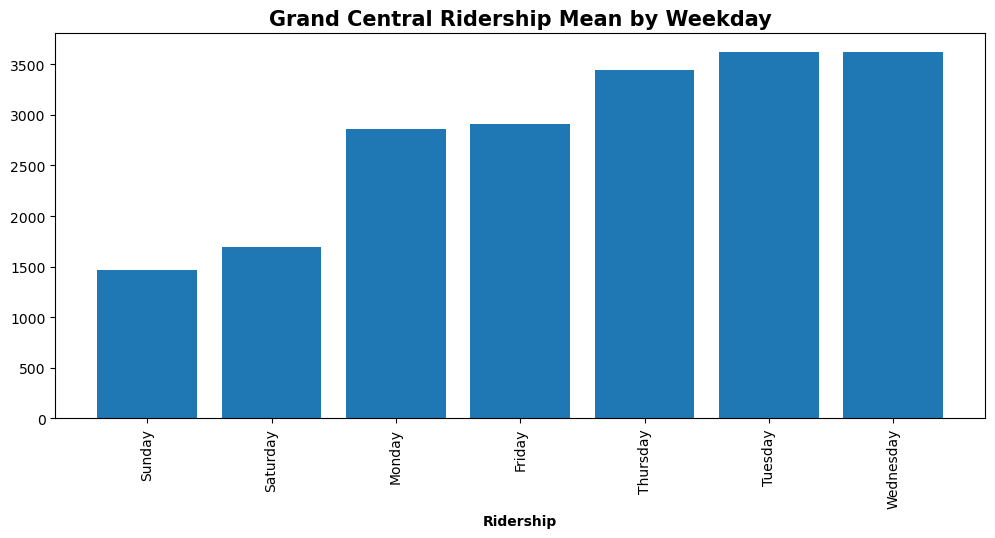

In [31]:
plt.figure(figsize = [12,5])
plt.title('Grand Central Ridership Mean by Weekday', fontsize = 15, weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.bar(Grand_C_day_of_week.index,Grand_C_day_of_week.ridership)

In [32]:
Yankee_Stadium = df_2022[df_2022["station_complex"] == "161 St-Yankee Stadium (B,D,4)"]



In [33]:
Yankee_Stadium=Yankee_Stadium.sort_values(['month', 'hour','day'])

In [35]:
Yankee_Stadium= Yankee_Stadium[Yankee_Stadium["month"]==6]
df5=Yankee_Stadium.sort_values("ridership",ascending=False)
df5["hour"].unique()



array([22, 16, 17, 15, 21, 23, 20, 19, 14,  7, 18,  8, 13,  6,  0,  9, 10,
       12, 11,  5,  4,  1,  2,  3])

In [36]:
Yankee_S_day_of_week = pd.DataFrame(Yankee_Stadium.groupby('day_of_week')['ridership'].mean().astype(int))
Yankee_S_day_of_week=Yankee_S_day_of_week.sort_values("ridership")
Yankee_S_day_of_week

,ridership
day_of_week,
Monday,590
Sunday,638
Saturday,737
Tuesday,768
Wednesday,777
Thursday,846
Friday,966


<BarContainer object of 7 artists>

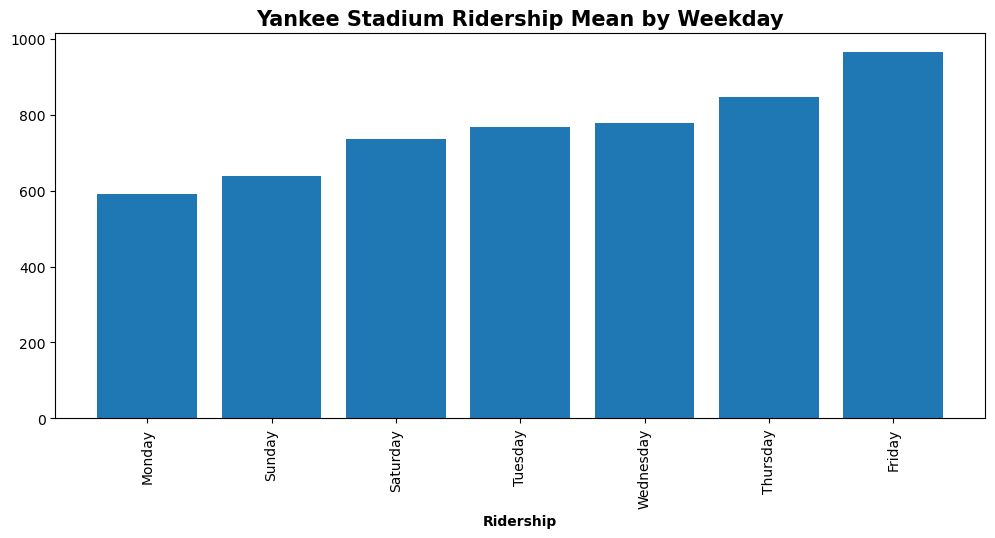

In [37]:
plt.figure(figsize = [12,5])
plt.title('Yankee Stadium Ridership Mean by Weekday', fontsize = 15, weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.bar(Yankee_S_day_of_week.index,Yankee_S_day_of_week.ridership)

In [38]:
times_sq= times_sq[times_sq["day"]==22]
times_sq_22=times_sq.sort_values("hour")
times_sq_22

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,hour,day_of_week,month,day
4705999,2022-06-22 00:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,2007,10,40.75731,-73.981964,POINT (-73.981964 40.75731),0,Wednesday,6,22
4688877,2022-06-22 01:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,708,5,40.75731,-73.981964,POINT (-73.981964 40.75731),1,Wednesday,6,22
4696266,2022-06-22 02:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,336,3,40.75731,-73.981964,POINT (-73.981964 40.75731),2,Wednesday,6,22
4702088,2022-06-22 03:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,235,1,40.75731,-73.981964,POINT (-73.981964 40.75731),3,Wednesday,6,22
4693654,2022-06-22 04:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,299,4,40.75731,-73.981964,POINT (-73.981964 40.75731),4,Wednesday,6,22
4714978,2022-06-22 05:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,2135,70,40.75731,-73.981964,POINT (-73.981964 40.75731),5,Wednesday,6,22
4706746,2022-06-22 06:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,5644,160,40.75731,-73.981964,POINT (-73.981964 40.75731),6,Wednesday,6,22
4696518,2022-06-22 07:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,8239,212,40.75731,-73.981964,POINT (-73.981964 40.75731),7,Wednesday,6,22
4690065,2022-06-22 08:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,10023,208,40.75731,-73.981964,POINT (-73.981964 40.75731),8,Wednesday,6,22
4713193,2022-06-22 09:00:00,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",M,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",all,6815,104,40.75731,-73.981964,POINT (-73.981964 40.75731),9,Wednesday,6,22


In [39]:
fulton_st=df_2022[df_2022["station_complex"]=="Fulton St (A,C,J,Z,2,3,4,5)"]
fulton_st

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,hour,day_of_week,month,day
3225397,2022-12-30 04:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,81,0,40.710373,-74.00657,POINT (-74.00657 40.710373),4,Friday,12,30
3225401,2022-06-12 06:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,137,0,40.710373,-74.00657,POINT (-74.00657 40.710373),6,Sunday,6,12
3225402,2022-09-15 15:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,4370,11,40.710373,-74.00657,POINT (-74.00657 40.710373),15,Thursday,9,15
3225406,2022-05-02 04:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,43,0,40.710373,-74.00657,POINT (-74.00657 40.710373),4,Monday,5,2
3225407,2022-02-20 00:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,314,0,40.710373,-74.00657,POINT (-74.00657 40.710373),0,Sunday,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257538,2022-05-03 19:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,3195,8,40.710373,-74.00657,POINT (-74.00657 40.710373),19,Tuesday,5,3
3257540,2022-07-12 15:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,3544,7,40.710373,-74.00657,POINT (-74.00657 40.710373),15,Tuesday,7,12
3257544,2022-11-08 06:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,1120,12,40.710373,-74.00657,POINT (-74.00657 40.710373),6,Tuesday,11,8
3257546,2022-05-18 02:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,77,0,40.710373,-74.00657,POINT (-74.00657 40.710373),2,Wednesday,5,18


In [40]:
fulton_st=fulton_st.sort_values(['month', 'hour','day'])
fulton_st= fulton_st[fulton_st["month"]==6]
df6=fulton_st.sort_values("ridership",ascending=False)
df6["hour"].unique()



array([17, 18, 16, 15,  8, 19, 14,  7, 13,  9, 20, 12, 22, 11, 21, 10,  6,
       23,  0,  5,  1,  2,  3,  4])

In [41]:
fulton_week = pd.DataFrame(fulton_st.groupby('day_of_week')['ridership'].mean().astype(int))
fulton_week=fulton_week.sort_values("ridership")
fulton_week

,ridership
day_of_week,
Sunday,869
Saturday,1164
Monday,1771
Friday,1972
Thursday,2210
Tuesday,2227
Wednesday,2227


<BarContainer object of 7 artists>

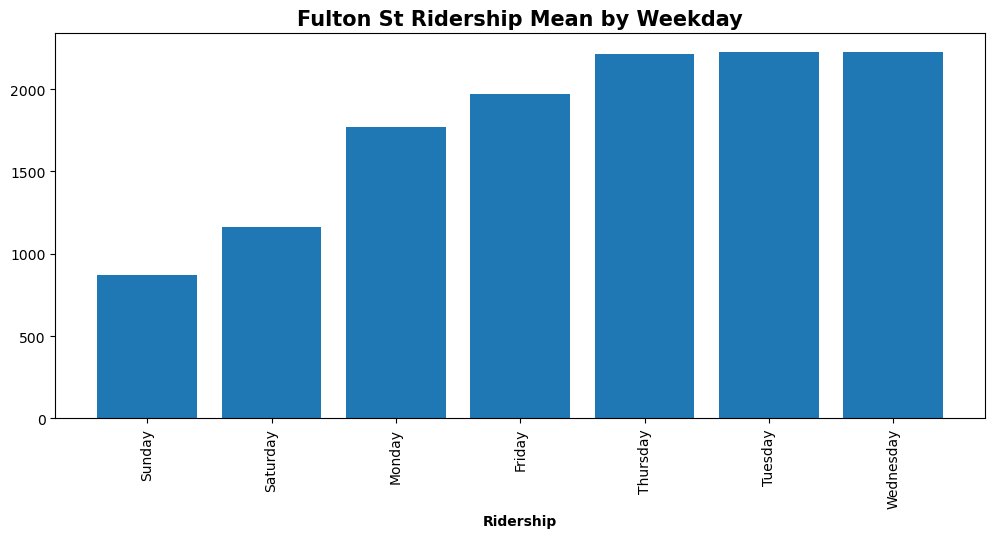

In [42]:
plt.figure(figsize = [12,5])
plt.title('Fulton St Ridership Mean by Weekday', fontsize = 15, weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.bar(fulton_week.index,fulton_week.ridership)

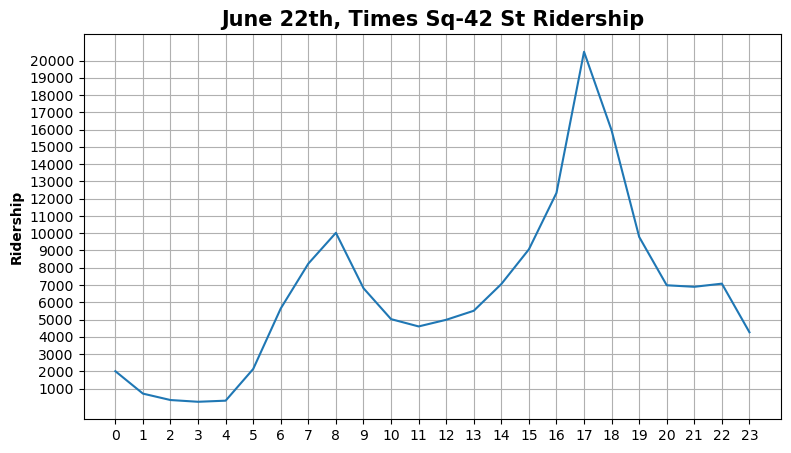

In [43]:
plt.figure(figsize=[9, 5])
plt.plot(times_sq_22.hour, times_sq_22.ridership)
plt.title('June 22th, Times Sq-42 St Ridership', fontsize=15, weight='bold')
plt.ylabel('Ridership', weight='bold')
plt.grid()

ticks_x = np.arange(0, 24, 1)
plt.xticks(ticks_x)

ticks_y = np.linspace(1000, 20000, 20)
plt.yticks(ticks_y)

plt.show()


In [44]:
Grand_Central= Grand_Central[Grand_Central["day"]==22]
Grand_Central_22=Grand_Central.sort_values("hour")
Grand_Central_22


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,hour,day_of_week,month,day
3308869,2022-06-22 00:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,722,5,40.751778,-73.976845,POINT (-73.976845 40.751778),0,Wednesday,6,22
3319321,2022-06-22 01:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,201,1,40.751778,-73.976845,POINT (-73.976845 40.751778),1,Wednesday,6,22
3320429,2022-06-22 02:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,51,0,40.751778,-73.976845,POINT (-73.976845 40.751778),2,Wednesday,6,22
3302965,2022-06-22 03:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,24,1,40.751778,-73.976845,POINT (-73.976845 40.751778),3,Wednesday,6,22
3307554,2022-06-22 04:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,40,1,40.751778,-73.976845,POINT (-73.976845 40.751778),4,Wednesday,6,22
3315955,2022-06-22 05:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,607,17,40.751778,-73.976845,POINT (-73.976845 40.751778),5,Wednesday,6,22
3314393,2022-06-22 06:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,1743,31,40.751778,-73.976845,POINT (-73.976845 40.751778),6,Wednesday,6,22
3304951,2022-06-22 07:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,4110,52,40.751778,-73.976845,POINT (-73.976845 40.751778),7,Wednesday,6,22
3297524,2022-06-22 08:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,7557,77,40.751778,-73.976845,POINT (-73.976845 40.751778),8,Wednesday,6,22
3322257,2022-06-22 09:00:00,R238,"Grand Central-42 St (S,4,5,6,7)",M,"5,S,4,7,6",all,4215,46,40.751778,-73.976845,POINT (-73.976845 40.751778),9,Wednesday,6,22


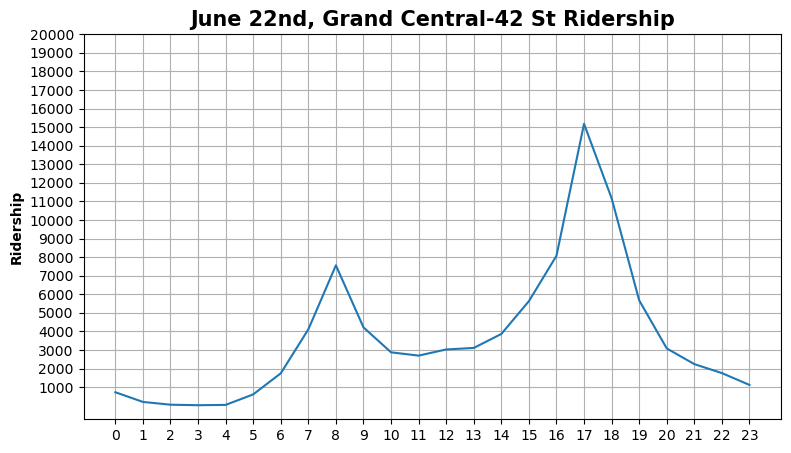

In [45]:
plt.figure(figsize=[9, 5])
plt.plot(Grand_Central_22.hour, Grand_Central_22.ridership)
plt.title('June 22nd, Grand Central-42 St Ridership', fontsize=15, weight='bold')
plt.ylabel('Ridership', weight='bold')
plt.grid()

ticks_x = np.arange(0, 24, 1)
plt.xticks(ticks_x)

ticks_y = np.linspace(1000, 20000, 20)
plt.yticks(ticks_y)

plt.show()


In [46]:
Yankee_Stadium = Yankee_Stadium[Yankee_Stadium["day"] == 24]
Yankee_Stadium_24 = Yankee_Stadium.sort_values("hour")
Yankee_Stadium_24


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,hour,day_of_week,month,day
429560,2022-06-24 00:00:00,N203,"161 St-Yankee Stadium (B,D,4)",BX,"4,B,D",all,245,1,40.827995,-73.92565,POINT (-73.92565 40.827995),0,Friday,6,24
424301,2022-06-24 01:00:00,N203,"161 St-Yankee Stadium (B,D,4)",BX,"4,B,D",all,65,0,40.827995,-73.92565,POINT (-73.92565 40.827995),1,Friday,6,24
416528,2022-06-24 02:00:00,N203,"161 St-Yankee Stadium (B,D,4)",BX,"4,B,D",all,29,1,40.827995,-73.92565,POINT (-73.92565 40.827995),2,Friday,6,24
412958,2022-06-24 03:00:00,N203,"161 St-Yankee Stadium (B,D,4)",BX,"4,B,D",all,41,2,40.827995,-73.92565,POINT (-73.92565 40.827995),3,Friday,6,24
436071,2022-06-24 04:00:00,N203,"161 St-Yankee Stadium (B,D,4)",BX,"4,B,D",all,126,10,40.827995,-73.92565,POINT (-73.92565 40.827995),4,Friday,6,24
426331,2022-06-24 05:00:00,N203,"161 St-Yankee Stadium (B,D,4)",BX,"4,B,D",all,425,48,40.827995,-73.92565,POINT (-73.92565 40.827995),5,Friday,6,24
418567,2022-06-24 06:00:00,N203,"161 St-Yankee Stadium (B,D,4)",BX,"4,B,D",all,889,84,40.827995,-73.92565,POINT (-73.92565 40.827995),6,Friday,6,24
434688,2022-06-24 07:00:00,N203,"161 St-Yankee Stadium (B,D,4)",BX,"4,B,D",all,1155,132,40.827995,-73.92565,POINT (-73.92565 40.827995),7,Friday,6,24
410592,2022-06-24 08:00:00,N203,"161 St-Yankee Stadium (B,D,4)",BX,"4,B,D",all,1200,144,40.827995,-73.92565,POINT (-73.92565 40.827995),8,Friday,6,24
419644,2022-06-24 09:00:00,N203,"161 St-Yankee Stadium (B,D,4)",BX,"4,B,D",all,738,67,40.827995,-73.92565,POINT (-73.92565 40.827995),9,Friday,6,24


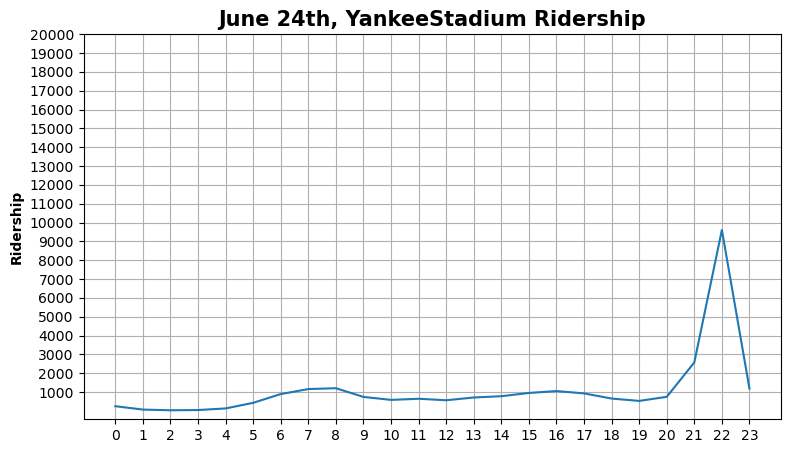

In [47]:
plt.figure(figsize=[9, 5])
plt.plot(Yankee_Stadium_24.hour, Yankee_Stadium_24.ridership)
plt.title('June 24th, YankeeStadium Ridership', fontsize=15, weight='bold')
plt.ylabel('Ridership', weight='bold')
plt.grid()

ticks_x = np.arange(0, 24, 1)
plt.xticks(ticks_x)

ticks_y = np.linspace(1000, 20000, 20)
plt.yticks(ticks_y)

plt.show()

### Exception

After plotting and organizing the data, I noticed an exception regarding Yankee Stadium. The stadium seems to get crowded primarily due to football matches, and as a result, the data we have from there is distinct and different from the other three stations. This difference could potentially skew the analysis or lead to inaccurate conclusions when comparing the four stations. Therefore, special consideration should be given to the Yankee Stadium data and, if appropriate, analyzed separately from the other stations.

In [48]:
fulton_st = fulton_st[fulton_st["day"] == 22]
fulton_st_22 = fulton_st.sort_values("hour")
fulton_st_22


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,hour,day_of_week,month,day
3233264,2022-06-22 00:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,269,2,40.710373,-74.00657,POINT (-74.00657 40.710373),0,Wednesday,6,22
3253695,2022-06-22 01:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,70,0,40.710373,-74.00657,POINT (-74.00657 40.710373),1,Wednesday,6,22
3242189,2022-06-22 02:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,30,0,40.710373,-74.00657,POINT (-74.00657 40.710373),2,Wednesday,6,22
3236427,2022-06-22 03:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,21,0,40.710373,-74.00657,POINT (-74.00657 40.710373),3,Wednesday,6,22
3226977,2022-06-22 04:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,42,0,40.710373,-74.00657,POINT (-74.00657 40.710373),4,Wednesday,6,22
3255547,2022-06-22 05:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,221,5,40.710373,-74.00657,POINT (-74.00657 40.710373),5,Wednesday,6,22
3256290,2022-06-22 06:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,1159,10,40.710373,-74.00657,POINT (-74.00657 40.710373),6,Wednesday,6,22
3226641,2022-06-22 07:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,2305,12,40.710373,-74.00657,POINT (-74.00657 40.710373),7,Wednesday,6,22
3236979,2022-06-22 08:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,3665,15,40.710373,-74.00657,POINT (-74.00657 40.710373),8,Wednesday,6,22
3241665,2022-06-22 09:00:00,N095,"Fulton St (A,C,J,Z,2,3,4,5)",M,"J,C,3,2,5,Z,4,A",all,2355,15,40.710373,-74.00657,POINT (-74.00657 40.710373),9,Wednesday,6,22


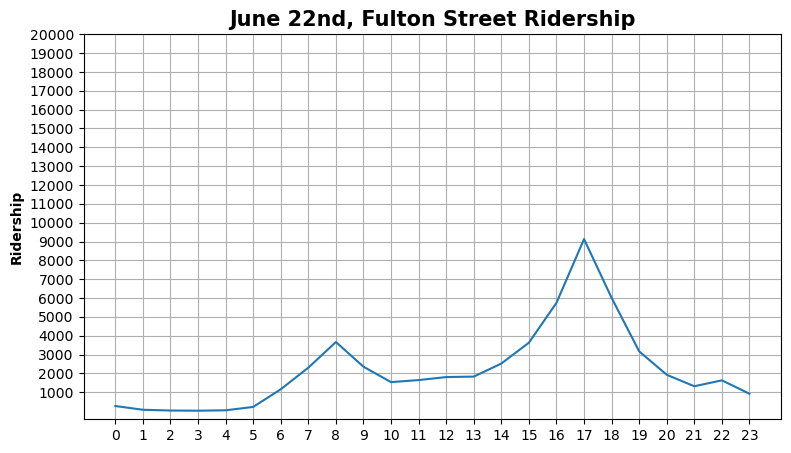

In [49]:
plt.figure(figsize=[9, 5])
plt.plot(fulton_st_22.hour, fulton_st_22.ridership)
plt.title('June 22nd, Fulton Street Ridership', fontsize=15, weight='bold')
plt.ylabel('Ridership', weight='bold')
plt.grid()

ticks_x = np.arange(0, 24, 1)
plt.xticks(ticks_x)

ticks_y = np.linspace(1000, 20000, 20)
plt.yticks(ticks_y)

plt.show()

### Merge

After identifying the busiest stations and hours, I merged all the data and conducted a comparative analysis. By combining the information, I aimed to gain insights and understand any correlations or patterns between the busiest stations and corresponding peak hours.

In [50]:
june_22nd_riderships_t = pd.DataFrame(times_sq_22.transit_timestamp)
june_22nd_riderships_t['times_sq'] = pd.DataFrame(times_sq_22.ridership)
june_22nd_riderships_g = pd.DataFrame(Grand_Central_22.transit_timestamp)
june_22nd_riderships_g['grand_central'] = pd.DataFrame(Grand_Central_22.ridership)
june_22nd_riderships_f = pd.DataFrame(fulton_st_22.transit_timestamp)
june_22nd_riderships_f['fulton_st'] = pd.DataFrame(fulton_st_22.ridership)

join= pd.merge(june_22nd_riderships_t,june_22nd_riderships_g,how="inner",on="transit_timestamp")
join2=pd.merge(join,june_22nd_riderships_f,how="inner",on="transit_timestamp")
join2

,transit_timestamp,times_sq,grand_central,fulton_st
0,2022-06-22 00:00:00,2007,722,269
1,2022-06-22 01:00:00,708,201,70
2,2022-06-22 02:00:00,336,51,30
3,2022-06-22 03:00:00,235,24,21
4,2022-06-22 04:00:00,299,40,42
5,2022-06-22 05:00:00,2135,607,221
6,2022-06-22 06:00:00,5644,1743,1159
7,2022-06-22 07:00:00,8239,4110,2305
8,2022-06-22 08:00:00,10023,7557,3665
9,2022-06-22 09:00:00,6815,4215,2355


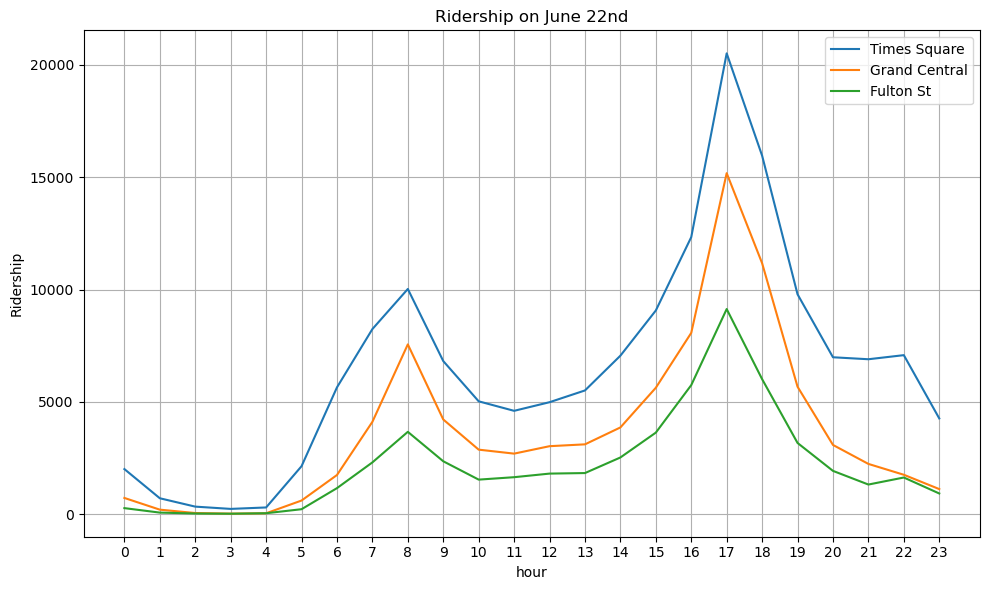

In [51]:



join2['hour'] = join2['transit_timestamp'].dt.hour


plt.figure(figsize=(10, 6))
plt.plot(join2['hour'], join2['times_sq'], label='Times Square')
plt.plot(join2['hour'], join2['grand_central'], label='Grand Central')
plt.plot(join2['hour'], join2['fulton_st'], label='Fulton St')


plt.xlabel('hour')
plt.ylabel('Ridership')
plt.title('Ridership on June 22nd')
plt.legend()
plt.grid()


plt.xticks(range(24))


plt.tight_layout()
plt.show()


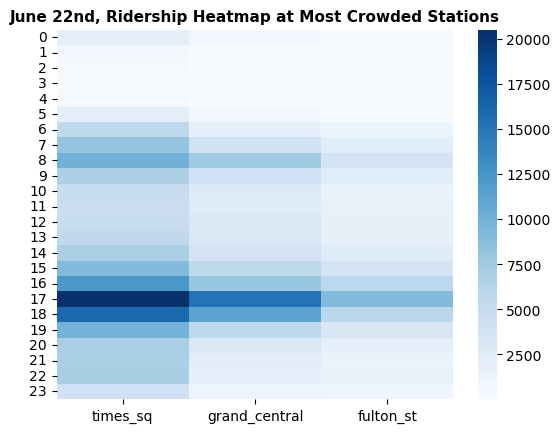

In [70]:
plt.title('June 22nd, Ridership Heatmap at Most Crowded Stations', fontsize = 11, weight='bold')
sns.heatmap(join2.drop(columns=['transit_timestamp','hour']), cmap='Blues');
